## Feature Engineering
Name: Ashwin Verma

### What Features Are You Looking For?
Nearest Defender to Each Receiver at the Snap Feature

### Why this Feature?
Knowing how far defenders are to the receiver will help to understand which defenses have worse coverage based on distance.
More distance would mean worse coverage

### Perform Feature Engineering to Find Features

### What Did You Find?

### Next Steps


In [3]:
import pandas as pd

In [ ]:
movement_data= pd.read_csv('nfl-big-data-bowl-2025/tracking_week_2.csv')

In [ ]:
movement_data= movement_data[(movement_data['gameId']==2022091901) & (movement_data['frameType']=='SNAP')].groupby('playId')

In [6]:
movement_data.head(5)

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091901,64,37078.0,Patrick Peterson,1,BEFORE_SNAP,2022-09-20 00:32:03.3,7.0,MIN,right,33.45,20.17,1.59,0.52,0.16,3.19,165.91,huddle_break_offense
1,2022091901,64,37078.0,Patrick Peterson,2,BEFORE_SNAP,2022-09-20 00:32:03.4,7.0,MIN,right,33.49,20.02,1.58,0.42,0.16,1.34,166.20,NaN
2,2022091901,64,37078.0,Patrick Peterson,3,BEFORE_SNAP,2022-09-20 00:32:03.5,7.0,MIN,right,33.53,19.86,1.58,0.28,0.16,357.20,164.50,NaN
3,2022091901,64,37078.0,Patrick Peterson,4,BEFORE_SNAP,2022-09-20 00:32:03.6,7.0,MIN,right,33.58,19.71,1.59,0.26,0.16,353.77,163.67,NaN
4,2022091901,64,37078.0,Patrick Peterson,5,BEFORE_SNAP,2022-09-20 00:32:03.7,7.0,MIN,right,33.62,19.56,1.58,0.34,0.16,351.27,162.08,NaN


In [ ]:
players=pd.read_csv('nfl-big-data-bowl-2025/players.csv')

In [8]:
players.head(4)

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis


In [18]:
import pandas
class nearest_defender_to_receiver_at_snap:
    def __init__(self, game_id:int, play_id:int):
        self.game_id=game_id
        self.play_id= play_id
        
    def getFeature(self,movement_data:pandas.DataFrame, player_data:pandas.DataFrame):
        nearest_defender_dict={}
        data= movement_data[(movement_data['gameId']==self.game_id) & (movement_data['frameType']=='SNAP') & (movement_data['playId']==self.play_id)]
        data= pandas.merge(data,player_data, how="left", on="nflId")
        
        number=1
        wr_count=(data[data['position']=='WR'].count())
        wr_count=wr_count['gameId']
        
        while number <= wr_count:
            data[f'nearest_defender_{number}']=0
            number+=1

        wide_recievers=data[data['position']=='WR']
        wide_recievers=wide_recievers['displayName_x'].unique()
        nearest_defender_dict,data= self.setDataFeature(data,nearest_defender_dict,wide_recievers)
        return nearest_defender_dict, data
    
    def setDataFeature(self,data:pandas.DataFrame, nearest_defender_dict:dict, wide_recievers):
        number=1
        for wr in wide_recievers:
            min_distance, defensive_player= self.defender_distance_to_wr(wr, data)
            data[f'nearest_defender_{number}']= min_distance
            nearest_defender_dict[wr]= defensive_player
            number+=1
        return nearest_defender_dict,data
    
    def defender_distance_to_wr(self,wide_reciever:str, data:pandas.DataFrame):
        defense_positions=['CB','SS', 'ILB', 'OLB', 'DE', 'DT', 'FS', 'NT', 'LB', 'MLB', 'DB']
        wr_df= data[data["displayName_x"]==wide_reciever]
        wr_x_distance= wr_df.iloc[0,10] #dataframe column position of x
        wr_y_distance= wr_df.iloc[0,11] #dataframe column position of y 
    
        min_distance=10000
        defensive_player= ""
        for index, row in data.iterrows():
            if row["position"] not in defense_positions:
                continue
        
            defender_distance_to_wr= (abs(row['x']-wr_x_distance)) + (abs(row['y']-wr_y_distance))
            if defender_distance_to_wr < min_distance:
                min_distance= defender_distance_to_wr
                defensive_player= row["displayName_x"]
        return min_distance, defensive_player 
        
        
        
    

In [19]:
test= nearest_defender_to_receiver_at_snap(2022091901,64)
nearest_defenders, data= test.getFeature(movement_data, players)

In [20]:
nearest_defenders

{'A.J. Brown': 'Danielle Hunter',
 'Quez Watkins': 'Patrick Peterson',
 'DeVonta Smith': "Za'Darius Smith"}

In [ ]:
data.iloc[-4:,:]

,gameId,playId,nflId,displayName_x,frameId,frameType,time,jerseyNumber,club,playDirection,...,event,height,weight,birthDate,collegeName,position,displayName_y,nearest_defender_1,nearest_defender_2,nearest_defender_3
19,2022091901,64,53439.0,DeVonta Smith,132,SNAP,2022-09-20 00:32:16.4,6.0,PHI,right,...,ball_snap,6-1,165.0,NaN,Alabama,WR,DeVonta Smith,4.59,10.69,2.91
20,2022091901,64,53466.0,Landon Dickerson,132,SNAP,2022-09-20 00:32:16.4,69.0,PHI,right,...,ball_snap,6-6,325.0,NaN,Alabama,G,Landon Dickerson,4.59,10.69,2.91
21,2022091901,64,53554.0,Camryn Bynum,132,SNAP,2022-09-20 00:32:16.4,24.0,MIN,right,...,ball_snap,6-1,195.0,NaN,California,FS,Camryn Bynum,4.59,10.69,2.91
22,2022091901,64,NaN,football,132,SNAP,2022-09-20 00:32:16.4,NaN,football,right,...,ball_snap,NaN,NaN,NaN,NaN,NaN,NaN,4.59,10.69,2.91


In [35]:
nearest_defender_dict={}
for name, df in movement_data:
    number=1
    data= pd.merge(df,players,how="left", on="nflId")
    wr_count=(data[data['position']=='WR'].count())
    wr_count=wr_count['gameId']
    
    while number <= wr_count:
        data[f'nearest_defender_{number}']=0
        number+=1
        
    all_timeframes= data['time'].unique()
    wide_recievers=data[data['position']=='WR']
    wide_recievers=wide_recievers['displayName_x'].unique()
    setDataFeature(data, nearest_defender_dict)

Nearest defender to A.J. Brown for play 64: Danielle Hunter
Nearest defender to Quez Watkins for play 64: Patrick Peterson
Nearest defender to DeVonta Smith for play 64: Za'Darius Smith
Nearest defender to A.J. Brown for play 112: Cameron Dantzler
Nearest defender to Quez Watkins for play 112: Chandon Sullivan
Nearest defender to DeVonta Smith for play 112: Patrick Peterson
Nearest defender to A.J. Brown for play 133: Cameron Dantzler
Nearest defender to Quez Watkins for play 133: Chandon Sullivan
Nearest defender to DeVonta Smith for play 133: Chandon Sullivan
Nearest defender to A.J. Brown for play 154: Chandon Sullivan
Nearest defender to Quez Watkins for play 154: Chandon Sullivan
Nearest defender to DeVonta Smith for play 154: Patrick Peterson
Nearest defender to Zach Pascal for play 213: Za'Darius Smith
Nearest defender to A.J. Brown for play 213: Cameron Dantzler
Nearest defender to DeVonta Smith for play 213: Danielle Hunter
Nearest defender to Zach Pascal for play 258: Za'Dari

In [34]:

def setDataFeature(data, nearest_defender_dict):
    number=1
    for wr in wide_recievers:
        min_distance, defensive_player= defender_distance_to_wr(wr, data)
        data[f'nearest_defender_{number}']= min_distance
        print(f'Nearest defender to {wr} for play {data["playId"][1]}: {defensive_player}')
        nearest_defender_dict[wr]= defensive_player
        number+=1

In [9]:
defense_positions=['CB','SS', 'ILB', 'OLB', 'DE', 'DT', 'FS', 'NT', 'LB', 'MLB', 'DB']
def defender_distance_to_wr(wide_reciever,data):
    wr_df= data[data["displayName_x"]==wide_reciever]
    wr_x_distance= wr_df.iloc[0,10] #dataframe column position of x
    wr_y_distance= wr_df.iloc[0,11] #dataframe column position of y 
    
    min_distance=10000
    defensive_player= ""
    for index, row in data.iterrows():
        if row["position"] not in defense_positions:
            continue
        
        defender_distance_to_wr= (abs(row['x']-wr_x_distance)) + (abs(row['y']-wr_y_distance))
        if defender_distance_to_wr < min_distance:
            min_distance= defender_distance_to_wr
            defensive_player= row["displayName_x"]
    return min_distance, defensive_player 

In [11]:
%pip install matplotlib
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [15]:
data.head(1)

,gameId,playId,nflId,displayName_x,frameId,frameType,time,jerseyNumber,club,playDirection,...,event,height,weight,birthDate,collegeName,position,displayName_y,nearest_defender_1,nearest_defender_2,nearest_defender_3
0,2022091901,4000,38542.0,Fletcher Cox,79,SNAP,2022-09-20 03:19:13.9,91.0,PHI,left,...,ball_snap,6-4,310.0,1990-12-13,Mississippi State,DT,Fletcher Cox,4.46,4.95,7.49


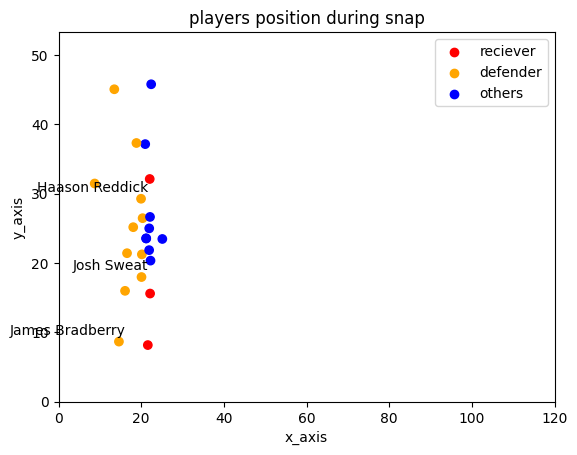

In [37]:
from adjustText import adjust_text  
import numpy as np
colors=['red' if position=="WR" else 'orange' if position in defense_positions else 'blue' for position in data['position']]
legend_labels = {'red': 'reciever', 'orange': 'defender', 'blue': 'others'}
plt.scatter(data['x'], data['y'], color=colors, marker='o')
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.xlim(0,120)
plt.ylim(0,53.3)

for color, label in legend_labels.items():
    plt.scatter([], [], color=color, label=label)  # Empty scatter for legend

texts=[]
for i, row in data.iterrows():
    if row["displayName_x"] in nearest_defender_dict.values():
        plt.annotate(row['displayName_x'], (row['x'], row['y']), textcoords="offset points", xytext=(5,5), ha='right')
    




    
plt.title("players position during snap")
plt.legend()
plt.show()

In [21]:
%pip install adjustText

Note: you may need to restart the kernel to use updated packages.
